<a href="https://colab.research.google.com/github/saidVaraMAEA/MineriadeDatosMAEA2026/blob/main/Brain_Tumor_Classification%3A_SaidVara_MAEA2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Tumores Cerebrales
13 febrero 2026
* Por: Pedro Said Vara Chacón
* Minería de Datos MAEA 2026
* Asesor: Gerónimo Quiñonez Barraza
* Facultad de Ciencias Exactas UJED
# Indice de contenido:
### Introducción
### 1. Carga de datos
### 2. Exploración
### 3. Preprocesamiento
### 4. División del dataset
### 5. Entrenamiento
### 6. Validación
### 7. Evaluación final
### 8. Comparación de modelos
### 9. Conclusiones

## **Introducción:**

El objetivo de este proyecto es construir y evaluar modelos de clasificación supervisada para predecir el diagnóstico de tumores cerebrales (MRI_Result) a partir de variables clínicas y/o radiológicas disponibles en el dataset brain_tumor_dataset.xlsx.
Se seguirá un flujo estándar de ciencia de datos:
Preprocesamiento → División Estratificada → Entrenamiento → Validación → Evaluación Final → Comparación de Modelos
El dataset se dividirá en:
50% Training
25% Validation
25% Testing
Manteniendo la proporción de clases mediante muestreo estratificado.

## 1. Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
df = pd.read_excel("/content/sample_data/brain_tumor_dataset.xlsx")
df.head()


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


## 2. Exploración del Dataset


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [7]:
df.describe()


,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,49.433700,5.236552,70.131699,1.547701
std,5773.647028,17.389296,2.754359,17.270834,0.835995
min,1.000000,20.000000,0.500410,40.002386,0.100017
25%,5000.750000,34.000000,2.836686,55.224439,0.830433
50%,10000.500000,49.000000,5.200675,70.305066,1.541821
75%,15000.250000,65.000000,7.624299,85.043395,2.262484
max,20000.000000,79.000000,9.999420,99.998125,2.999835


In [8]:
df.isnull().sum()


,0
Patient_ID,0
Age,0
Gender,0
Tumor_Type,0
Tumor_Size,0
Location,0
Histology,0
Stage,0
Symptom_1,0
Symptom_2,0


### Distribución de la variable objetivo:


In [9]:
df['MRI_Result'].value_counts()


,count
MRI_Result,
Positive,10029
Negative,9971


In [10]:
df['MRI_Result'].value_counts(normalize=True)


,proportion
MRI_Result,
Positive,0.50145
Negative,0.49855


### Análisis Exploratorio
La variable objetivo MRI_Result presenta la siguiente distribución:



*   Positive: 10,029 casos (50.145%)
*   Negative: 9,971 casos (49.855%)




El dataset se encuentra prácticamente balanceado, ya que ambas clases tienen una proporción muy similar. Esto reduce el riesgo de sesgo hacia una clase dominante y permite interpretar métricas como accuracy de manera confiable.
Aun así, se utilizará división estratificada para mantener esta proporción en los conjuntos de entrenamiento, validación y prueba.

## 3. Separación de variables


In [11]:
X = df.drop("MRI_Result", axis=1)
y = df["MRI_Result"]


### Identificación de tipos de variables

In [12]:
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

print("Variables numéricas:", list(num_features))
print("Variables categóricas:", list(cat_features))


Variables numéricas: ['Patient_ID', 'Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']
Variables categóricas: ['Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Family_History', 'Follow_Up_Required']


## 4. División Estratificada
### Training 50%

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.5,
    stratify=y,
    random_state=42
)


### Validation 25% & Testing 25%

In [14]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)


Verificación de proporciones:

In [15]:
print("Train:\n", y_train.value_counts(normalize=True))
print("Validation:\n", y_val.value_counts(normalize=True))
print("Test:\n", y_test.value_counts(normalize=True))


Train:
 MRI_Result
Positive    0.5014
Negative    0.4986
Name: proportion, dtype: float64
Validation:
 MRI_Result
Positive    0.5014
Negative    0.4986
Name: proportion, dtype: float64
Test:
 MRI_Result
Positive    0.5016
Negative    0.4984
Name: proportion, dtype: float64


Las proporciones de la variable objetivo en los conjuntos de entrenamiento, validación y prueba se mantienen prácticamente idénticas a la distribución original (≈50% / 50%).
Esto confirma que la división estratificada fue aplicada correctamente y garantiza que el modelo será entrenado y evaluado bajo distribuciones de clase consistentes.

## 5. Pipeline de Preprocesamiento
### Transformador numérico

In [16]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


## Transformador categórico


In [17]:
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


## ColumnTransformer


In [18]:
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


## 6. Entrenamiento de Modelos
Se evaluarán los siguientes algoritmos:


In [19]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


Evaluación en conjunto de validación:


In [20]:
results = {}

for name, model in models.items():

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    results[name] = acc

    print("\n", name)
    print("Validation Accuracy:", acc)
    print(classification_report(y_val, y_val_pred))



 Logistic Regression
Validation Accuracy: 0.4846
              precision    recall  f1-score   support

    Negative       0.48      0.45      0.46      2493
    Positive       0.49      0.52      0.50      2507

    accuracy                           0.48      5000
   macro avg       0.48      0.48      0.48      5000
weighted avg       0.48      0.48      0.48      5000


 Decision Tree
Validation Accuracy: 0.4974
              precision    recall  f1-score   support

    Negative       0.50      0.50      0.50      2493
    Positive       0.50      0.50      0.50      2507

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000


 Random Forest
Validation Accuracy: 0.5066
              precision    recall  f1-score   support

    Negative       0.50      0.53      0.52      2493
    Positive       0.51      0.48      0.49      2507

    accuracy                           0.51 

## 7. Comparación de Modelos


In [21]:
results_df = pd.DataFrame(results.items(), columns=["Model","Validation Accuracy"])
results_df.sort_values(by="Validation Accuracy", ascending=False)


,Model,Validation Accuracy
2,Random Forest,0.5066
4,KNN,0.4996
1,Decision Tree,0.4974
3,SVM,0.4964
0,Logistic Regression,0.4846


El modelo con mejor desempeño fue Random Forest, alcanzando una accuracy de 50.66%. Sin embargo, todos los modelos presentan un rendimiento cercano al 50%, lo cual es prácticamente equivalente a una clasificación aleatoria en un dataset balanceado.

Esto sugiere que:
Las variables disponibles podrían no tener suficiente poder predictivo.
El modelo no está capturando patrones relevantes en los datos.
Podría requerirse ajuste de hiperparámetros o ingeniería de características.
Dado que el dataset está balanceado (~50% / 50%), una accuracy cercana a 50% indica que el modelo no está aprendiendo una separación efectiva entre las clases.

Por consistencia metodológica, se seleccionará Random Forest para la evaluación final en el conjunto de prueba, ya que obtuvo el mejor desempeño relativo en validación. No obstante, los resultados indican que el modelo no presenta una capacidad predictiva sólida en su estado actual.

## 8. Evaluación Final en Test

In [22]:
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.5004
              precision    recall  f1-score   support

    Negative       0.50      0.52      0.51      2492
    Positive       0.50      0.48      0.49      2508

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



## Matriz de confusión:


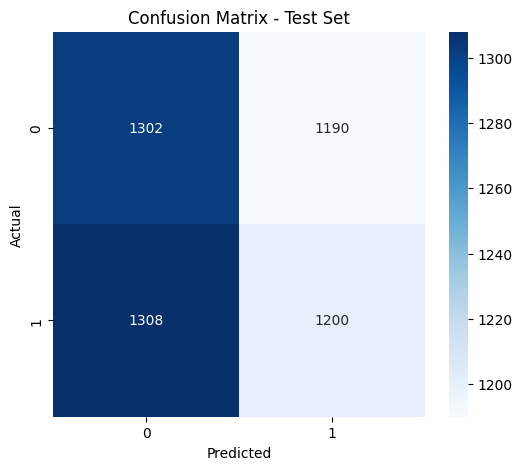

In [23]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()


## Conclusiones

En este ejercicio se implementó un flujo completo de Machine Learning supervisado, incluyendo:

* División estratificada 50% / 25% / 25%


* Pipeline de preprocesamiento con imputación, escalamiento y codificación
* Entrenamiento y comparación de múltiples algoritmos
* Evaluación independiente en conjunto de prueba

El modelo con mejor desempeño fue Random Forest; sin embargo, su rendimiento final (accuracy ≈ 50%) indica que no existe una relación predictiva fuerte entre las variables disponibles y la variable objetivo MRI_Result.
Este resultado sugiere que:

Las variables del dataset podrían no contener información suficientemente discriminativa.
Se requiere ingeniería de características adicional.
Podrían necesitarse variables clínicas o radiológicas más relevantes.
Sería recomendable realizar optimización de hiperparámetros o validación cruzada.
También podría explorarse análisis exploratorio más profundo para detectar patrones ocultos.

Aunque el modelo no alcanzó un desempeño clínicamente útil, el proyecto demuestra la correcta implementación metodológica del proceso de modelado supervisado y proporciona evidencia clara sobre las limitaciones predictivas del dataset analizado.
En ciencia de datos, demostrar que un modelo no funciona también es un resultado válido y valioso, ya que evita conclusiones incorrectas y orienta futuras mejoras.